<a href="https://colab.research.google.com/github/Deepak-Mewada/NeuralDecoder/blob/main/BrainDecoder/Basics/train_test_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install braindecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install moabb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.1 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=294297968add9dec34645107be60189ba988dbce40933209bc320329d5fcfb7f
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc933dc088e287ebfaac5aa9bdc6a38a9db193ce1f1
Successfully built pyriemann
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninst

In [ ]:
from braindecode.datasets import MOABBDataset

subject_id = 3
dataset = MOABBDataset(dataset_name = "BNCI2014_001", subject_ids = [subject_id])


<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
/usr/local/lib/python3.10/dist-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(
/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:55: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_P

MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 20.4GB/s]
SHA256 hash of downloaded file: 7e731ee8b681d5da6ecb11ae1d4e64b1653c7f15aad5d6b7620b25ce53141e80
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 42.3M/42.3M [

In [ ]:
import numpy as np

from braindecode.preprocessing import(exponential_moving_standardize,
                                      preprocess,
                                      Preprocessor)
low_cut_hz = 4.0
high_cut_hz = 38.0

factor_new = 1e-3
init_block_size = 1000


preprocessors = [
    Preprocessor("pick_types", eeg = True, meg = False, stim = False),
    Preprocessor(
        lambda data, factor: np.multiply(data, factor),
        factor = 1e6),
    Preprocessor("filter", l_freq = low_cut_hz, h_freq = high_cut_hz),
    Preprocessor(
        exponential_moving_standardize,
        factor_new = factor_new,
        init_block_size = init_block_size)]


preprocess(dataset, preprocessors, n_jobs = -1)



/usr/local/lib/python3.10/dist-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


In [ ]:
from braindecode.preprocessing import create_windows_from_events

trial_start_offset_seconds = -0.5
sfreq = dataset.datasets[0].raw.info["sfreq"]
assert all([ds.raw.info["sfreq"] == sfreq for ds in dataset.datasets])
trial_start_offset_samples = int(trial_start_offset_seconds * sfreq)

windows_dataset =  create_windows_from_events(
     dataset,
     trial_start_offset_samples = trial_start_offset_samples,
     trial_stop_offset_samples = 0,
     preload = True
 )

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


In [ ]:
splitted = windows_dataset.split("session")
train_set = splitted['0train']
test_set = splitted['1test']

In [ ]:
import torch
from braindecode.util import set_random_seeds
from braindecode.models import ShallowFBCSPNet

cuda = torch.cuda.is_available()
device = "cuda" if cuda else "cpu"
if cuda:
  torch.backends.cudnn.benchmark = True
seed = 20200220
set_random_seeds(seed = seed, cuda = cuda)

n_classes = 4
classes = list(range(n_classes))
n_channels = windows_dataset[0][0].shape[0]
input_window_samples = windows_dataset[0][0].shape[1]

model = ShallowFBCSPNet(
    n_channels,
    n_classes,
    input_window_samples = input_window_samples,
    final_conv_length ="auto"
)

print(model)

if cuda:
  model.cuda()

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(


Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
ShallowFBCSPNet (ShallowFBCSPNet)        [1, 22, 1125]             [1, 4]                    --                        --
├─Ensure4d (ensuredims): 1-1             [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
├─Rearrange (dimshuffle): 1-2            [1, 22, 1125, 1]          [1, 1, 1125, 22]          --                        --
├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1125, 22]          [1, 40, 1101, 1]          36,240                    --
├─BatchNorm2d (bnorm): 1-4               [1, 40, 1101, 1]          [1, 40, 1101, 1]          80                        --
├─Expression (conv_nonlin_exp): 1-5      [1, 40, 1101, 1]          [1, 40, 1101, 1]          --                        --
├─AvgPool2d (pool): 1-6                  [1, 40, 1101, 1]          [1, 40, 69, 1]            --                        [75, 1]
├─Express

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [ ]:
from skorch.callbacks import LRScheduler
from braindecode import EEGClassifier

lr = 0.0625 * 0.01
weight_decay = 0
batch_size = 64
n_epochs = 2

clf = EEGClassifier(
    model,
    criterion = torch.nn.NLLLoss,
    optimizer = torch.optim.AdamW,
    train_split = None,
    optimizer__lr = lr,
    optimizer__weight_decay = weight_decay,
    batch_size = batch_size,
    callbacks =["accuracy", ("lr_scheduler", LRScheduler("CosineAnnealingLR", T_max = n_epochs - 1))],
    device = device,
    classes = classes,
    max_epochs = n_epochs
)

clf.fit(train_set, y = None)

y_test = test_set.get_metadata().target
test_acc = clf.score(test_set, y = y_test)
print(f"Test acc: {(test_acc * 100): .2f}%")


  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.2500        1.5950  0.0006  4.4941
      2            0.2500        1.3661  0.0000  3.3895
Test acc:  25.35%


<Axes: title={'center': 'Train - Test split'}, xlabel='Number of samples.'>

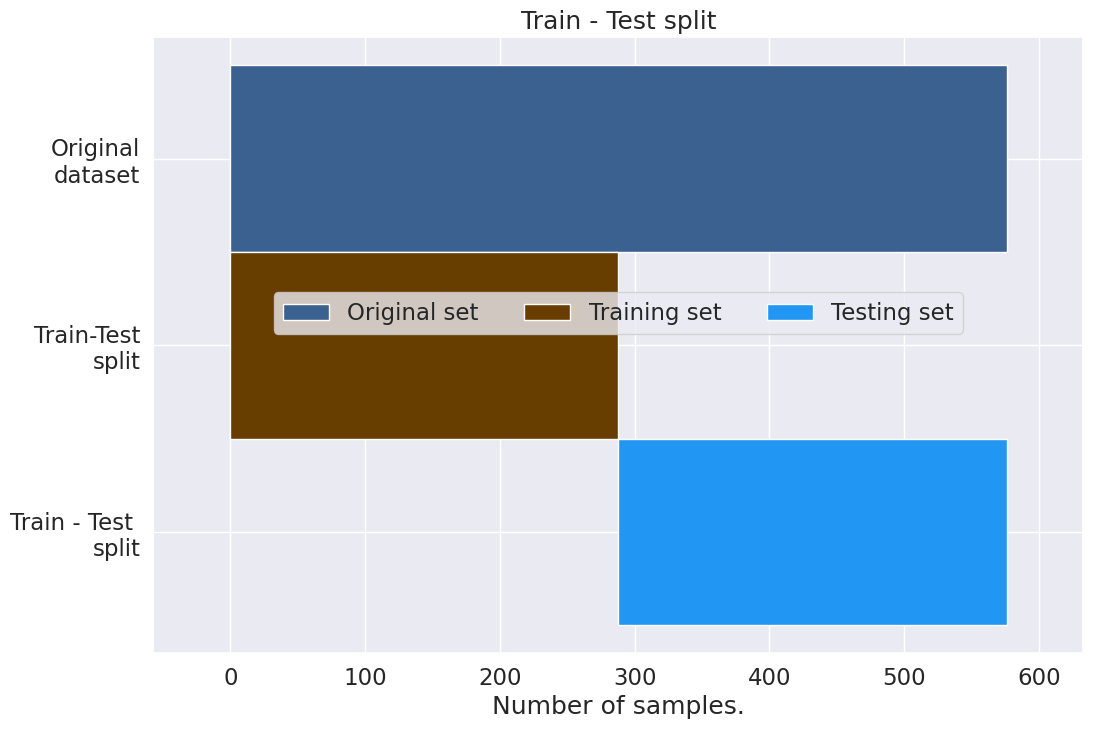

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

sns.set(font_scale = 1.5)

def plot_simple_train_test(ax, all_dataset, train_set, test_set):
  """Create a sample plot for training-testing split"""
  bd_cmap = ["#3A6190", "#683E00", "#DDF2FF", "#2196F3"]

  ax.barh("Original\ndataset", len(all_dataset), left = 0, height = 1,
          color = bd_cmap[0])
  ax.barh("Train-Test\nsplit", len(train_set), left = 0, height = 1, color = bd_cmap[1])
  ax.barh("Train - Test \nsplit", len(test_set), left = len(train_set), height = 1,
          color = bd_cmap[3])
  ax.invert_yaxis()

  ax.set(xlabel = "Number of samples.", title = "Train - Test split")
  ax.legend(["Original set", "Training set", "Testing set"], loc = 'lower center', ncols = 4, bbox_to_anchor = (0.5, 0.5))
  ax.set_xlim([-int(0.1 * len(all_dataset)), int(1.1 * len(all_dataset))])
  return ax



fig, ax = plt.subplots(figsize = (12, 8))
plot_simple_train_test(ax = ax, all_dataset = windows_dataset, train_set = train_set,
                       test_set = test_set)



In [ ]:
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from skorch.helper import predefined_split, SliceDataset

X_train = SliceDataset(train_set, idx = 0)
y_train = np.array([y for y in SliceDataset(train_set, idx = 1)])
train_indices, val_indices = train_test_split(
    X_train.indices_, test_size = 0.2, shuffle = False
)

train_subset = Subset(train_set, train_indices)
val_subset = Subset(train_set, val_indices)

In [ ]:
clf = EEGClassifier(
    model,
    criterion = torch.nn.NLLLoss,
    optimizer = torch.optim.AdamW,
    train_split = predefined_split(val_subset),
    optimizer__lr =lr,
    optimizer__weight_decay = weight_decay,
    batch_size = batch_size,
    callbacks =[
        "accuracy",
        ("lr_scheduler", LRScheduler("CosineAnnealingLR", T_max = n_epochs - 1)),
    ],
    device = device,
    classes = classes,
    max_epochs = n_epochs
)

clf.fit(train_subset, y = None)

y_test = test_set.get_metadata().target
test_acc = clf.score(test_set, y=y_test)
print(f"Test acc: {(test_acc * 100): .2f}%")


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.3435        1.3505       0.2759            0.2759        2.2668  0.0006  3.9802
      2            0.3478        1.1789       0.2759            0.2759        2.0686  0.0000  3.2337
Test acc:  27.43%


<Axes: title={'center': 'Train-Test-Valid split'}, xlabel='Number of samples.'>

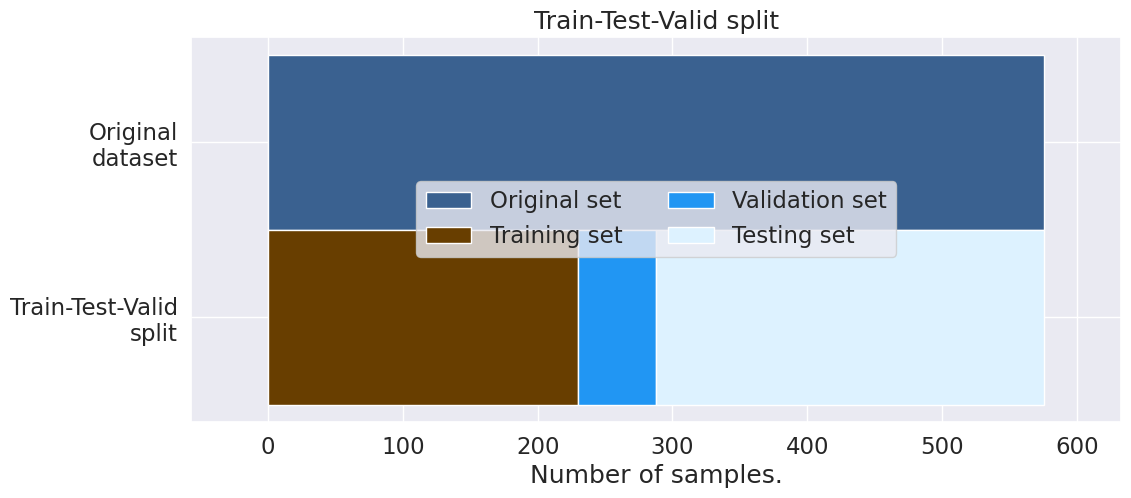

In [ ]:
def plot_train_valid_test(ax, all_dataset, train_subset, val_subset, test_set):
  """CReate a sample plot for training, validation, testing."""

  bd_cmap = ["#3A6190", "#683E00", "#2196F3", "#DDF2FF"]

  n_train, n_val, n_test = len(train_subset), len(val_subset), len(test_set)

  ax.barh("Original\ndataset", len(all_dataset), left = 0, height = 1, color = bd_cmap[0])
  ax.barh("Train-Test-Valid\nsplit", n_train, left = 0, height = 1, color = bd_cmap[1])
  ax.barh("Train-Test-Valid\nsplit", n_val, left = n_train, height = 1, color = bd_cmap[2])
  ax.barh("Train-Test-Valid\nsplit", n_test, left = n_train + n_val, height = 1, color = bd_cmap[3])


  ax.invert_yaxis()
  ax.set(xlabel = "Number of samples.", title = "Train-Test-Valid split")
  ax.legend(["Original set", "Training set", "Validation set", "Testing set"],
            loc = "lower center", ncols = 2, bbox_to_anchor = (0.5, 0.4))
  ax.set_xlim([-int(0.1 * len(all_dataset)), int(1.1 * len(all_dataset))])
  return ax


fig, ax = plt.subplots(figsize = (12, 5))
plot_train_valid_test(ax = ax, all_dataset = windows_dataset,
                      train_subset = train_subset, val_subset = val_subset, test_set = test_set)


In [ ]:
from skorch.callbacks import LRScheduler
from braindecode import EEGClassifier
from sklearn.model_selection import KFold, cross_val_score


lr = 0.0625 * 0.01
weight_decay = 0
batch_size = 64
n_epochs = 2

clf = EEGClassifier(
    model,
    criterion = torch.nn.NLLLoss,
    optimizer = torch.optim.AdamW,
    train_split = None,
    optimizer__lr = lr,
    optimizer__weight_decay = weight_decay,
    batch_size = batch_size,
    callbacks = [
        "accuracy",
        ("lr_scheduler", LRScheduler("CosineAnnealingLR", T_max = n_epochs - 1)),
    ],
    device = device,
    classes = classes,
    max_epochs = n_epochs
)

train_val_split = KFold(n_splits = 5, shuffle = False)
cv_results = cross_val_score(
    clf, X_train, y_train, scoring = "accuracy", cv = train_val_split, n_jobs = 1
)
print(
    f"Validation accuracy: {np.mean(cv_results * 100): .2f}"
    f"+-{np.std(cv_results * 100): .2f}%"
)

  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.3870        1.2082  0.0006  5.4614
      2            0.3957        1.1560  0.0000  5.6039
  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.2870        1.2641  0.0006  5.6515
      2            0.2870        1.2266  0.0000  4.7512
  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.3957        1.3003  0.0006  2.5861
      2            0.4087        1.1477  0.0000  3.7161
  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.2727        1.2076  0.0006  2.5484
      2            0.2900        1.1233  0.0000  2.6082
  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------ 

In [ ]:
cv_results

array([0.37931034, 0.24137931, 0.36206897, 0.26315789, 0.35087719])

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

train_val_split = [
    tuple(train_test_split(X_train.indices_, test_size = 0.2, shuffle = False))
]

param_grid = {
    "optimizer__lr": [0.00625, 0.000625]
}



search = GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    cv = train_val_split,
    return_train_score = True,
    scoring = "accuracy",
    refit = True,
    verbose = 1,
    error_score = "raise",
    n_jobs = 1
)


search.fit(X_train, y_train)
search_results = pd.DataFrame(search.cv_results_)

best_run = search_results[search_results["rank_test_score"] == 1].squeeze()
best_parameters = best_run["params"]

Fitting 1 folds for each of 2 candidates, totalling 2 fits
  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.2739        1.5258  0.0063  4.1096
      2            0.4000        1.4053  0.0000  2.6216
  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.4826        1.2205  0.0006  2.6023
      2            0.5130        1.1218  0.0000  3.0949
  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.4375        1.2991  0.0006  3.4515
      2            0.4688        1.1161  0.0000  3.4688
